In [7]:
# all imports here
import numpy as np
import gudhi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
from sklearn import datasets
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
#from tqdm import tqdm, trange

In [8]:
def load_pcd(filename, show=False):
    ''' Loads 2D/3D point cloud data from *.npy files

    Parameters:
        filename: name of *.npy file.
        show: option to visualize point clouds in 3D

    Returns: 
        np.array formatted as [point_1, point_2, ..., point_n]
    
    '''
    array = np.load(filename)
    dim = array.shape[1]
    if show:
        fig = plt.figure()
        if dim == 3:
            ax = fig.add_subplot(projection='3d')
            ax.set_xlim3d(-1, 1)
            ax.set_ylim3d(-1, 1)
            ax.set_zlim3d(-1, 1)
            ax.scatter(array[:, 0],array[:, 1], array[:, 2])
        else:
            ax = fig.add_subplot()
            ax.scatter(array[:, 0], array[:, 1])
    return array 

In [9]:

def complex_visualizer_PCD(points, complex, ax, animation=False):
    ''' Visualizes complex generated from 2D or 3D point cloud data.

    Parameters:
        points: original point cloud data
        complex: simplicial complex formatted as [simplex_1, simplex_2, .... simplex_nn]. 
        Each simplex_i is a list of indices.

    '''
    dim = points.shape[1]

    filtration = complex.get_filtration()
    if dim == 3:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='k')
    for filtered_value in filtration:
        if filtered_value[1] == 0.0:
            continue
        indices = filtered_value[0]
        sdim = len(indices) - 1
        if sdim > 1:
            alpha=0.3
        else:
            alpha = 1.0
        splex_verts = points[indices]
        color = [(1 - 1/sdim)*0.5, (1 - 1/sdim)*0.5, (1 - 1/sdim)]
        if dim == 2:
            ax.fill(splex_verts[:, 0], splex_verts[:, 1], c=color, alpha=alpha)
        else:
            verts = splex_verts.tolist()
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=alpha))
    if animation:
        assert dim == 2
        container = ax.get_children()
        return container
    return ax

In [10]:
import time
def rips_gudhi(points, radius, max_dimension=2, show=False):
    ''' TODO: use Gudhi to create a Rips complex of some fixed radius parameter. 

    Parameters:
        points: original point cloud data
        radius: radius parameter
        max_dimension: maximum dimension of simplices in resulting complex
        show: option to visualize complex 

    Returns:
        Gudhi SimplexTree object

    '''
    cplex = gudhi.RipsComplex(points=points, max_edge_length=radius).create_simplex_tree(max_dimension=max_dimension)
    if show:
        fig = plt.figure()
        if points.shape[1] == 3:
            ax=fig.add_subplot(projection='3d')
        else:
            ax = fig.add_subplot()
        ax = complex_visualizer_PCD(points, cplex, ax)
    return cplex

In [11]:
def plot_persistence_diagram(ax, persistence_points, dimension=0):
    dgm = []
    for pt in persistence_points:
        if pt[0] == dimension:
            dgm.append(pt[1])
    dgm = np.array(dgm)
    ax.scatter(dgm[:, 0], dgm[:, 1])

In [12]:
points = load_pcd('msri-day1/data/sam/msri-data/point-clouds/2D/two-circles.npy', show=True)

usetex mode requires TeX.


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

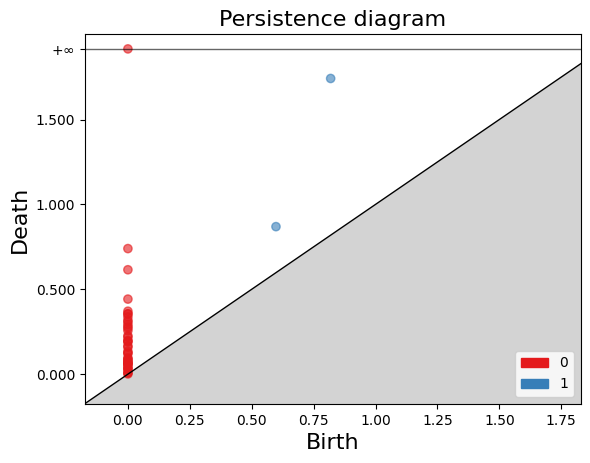

In [8]:
complex = rips_gudhi(points, radius=2.0, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

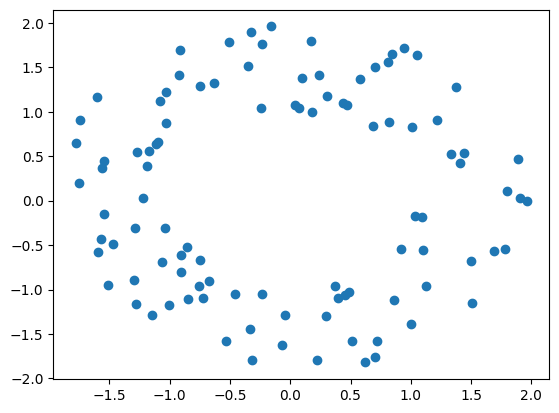

In [9]:
points = load_pcd('msri-day1/data/sam/msri-data/point-clouds/2D/annulus.npy', show=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

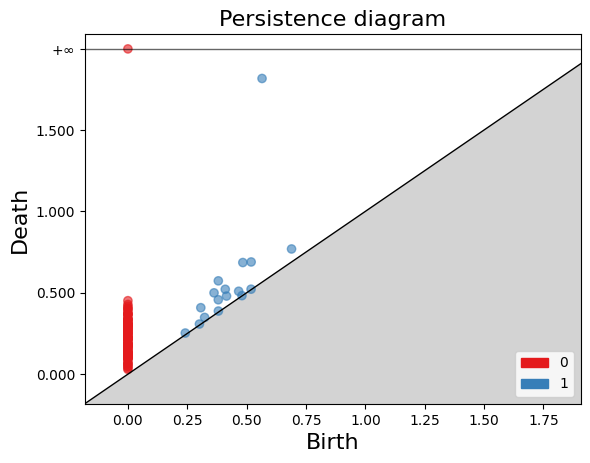

In [10]:
complex = rips_gudhi(points, radius=2.0, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

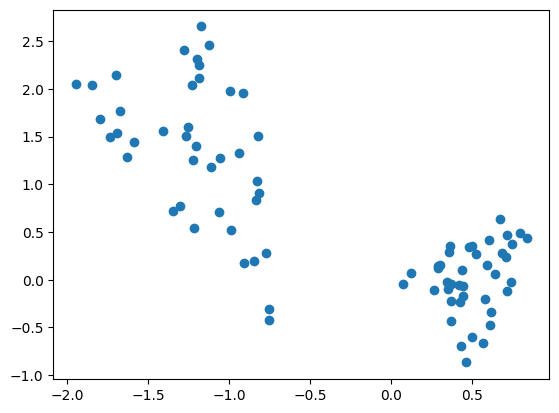

In [11]:
points = load_pcd('msri-day1/data/sam/msri-data/point-clouds/2D/triangles.npy', show=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

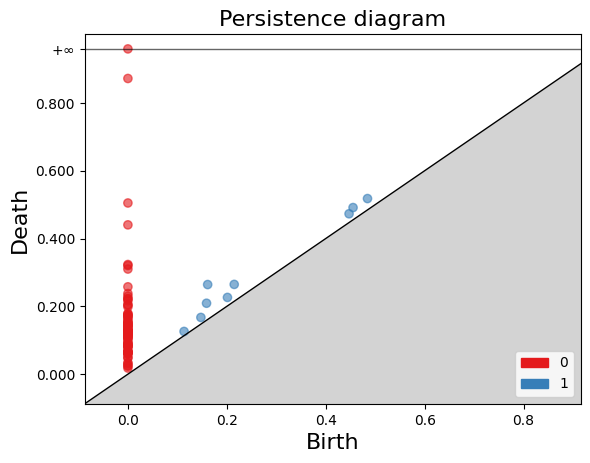

In [12]:
complex = rips_gudhi(points, radius=0.9, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

In [6]:
# TODO: compute persistent homology/diagrams for 3D point cloud data.

#loading in the 3D data
points = load_pcd('msri-day1/data/sam/msri-data/point-clouds/3D/cup.npy', show = True)


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

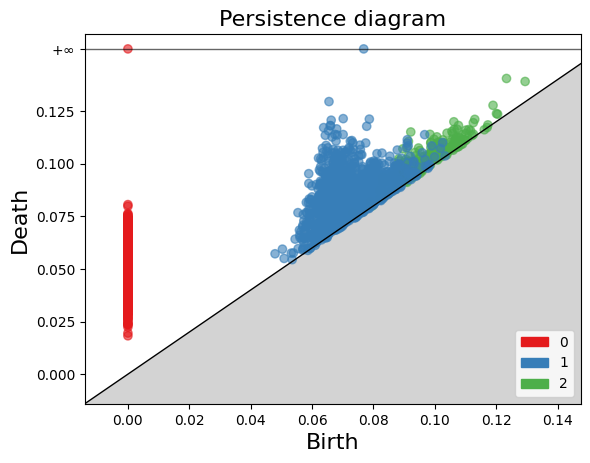

In [19]:
complex = rips_gudhi(points, radius=0.2, max_dimension=3, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

#Play with the radius, note how there are different birth death points of different homologies that get added once we
#up the radius. Notice how the birth death points shift down and towards the diagonal as we increase the radius. This 
#also ups the runtime. These algorithms work with complexity O(n^3) with number of simplices being n. 

In [ ]:
#Some different 3D Data:

points = load_pcd('msri-day1/data/sam/msri-data/point-clouds/3D/cone.npy')

Image data
Now, let's work with some image data. You can use the code from day-1 to load images (represented as matrices of pixel values) from toy datasets in already present in the sklearn library.

Use the Ripser library to construct a 0-dimension sublevel set filtration on each image. See the following documentation for more information: Documentation. Start out with a simple example (e.g. an image from MNIST) and make sure you understand the resulting persistence diagram.

(1797, 64)


<Figure size 640x480 with 0 Axes>

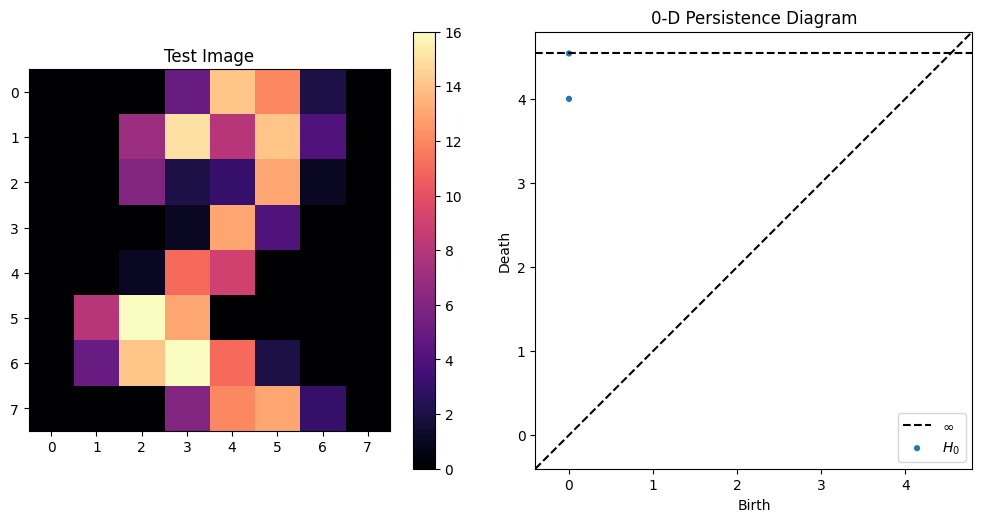

In [20]:
# TODO:Compute persistent homology/diagrams for image data. 


#This is how we can compute persistent homology for MNIST. Below, I will do other images
import matplotlib.pyplot as plt
from ripser import ripser, lower_star_img
from sklearn.datasets import load_digits
from persim import plot_diagrams

digits = load_digits()

print(digits.data.shape)

plt.magma()
#plt.matshow(digits.images[52])

#plt.show()


dgm = lower_star_img(digits.images[50])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(digits.images[50])
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()
